# Data analysis of dataset: Ford

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load dataset

In [11]:
DATASET = '../data/ford/FordA.txt'

series = []
labels = []

with open(DATASET, 'r') as fp:
    for line in fp:
        values = line.strip().split()
        labels.append(float(values[0]) == 1)
        series.append(np.array(values[1:], dtype=np.float32))

# Transform into numpy arrays
series = np.array(series)
labels = np.array(labels)

## Classes of audios

In [15]:
def plot_donut_goodbad_samples(plot_index, caption, total_good_samples, total_bad_samples):
    n_samples = total_good_samples + total_bad_samples
    ratio_good_samples = total_good_samples / n_samples * 100
    ratio_bad_samples = total_bad_samples / n_samples * 100

    labels = [
        'Good: %d (%.2f%%)' % (total_good_samples, ratio_good_samples),
        'Bad: %d (%.2f%%)' % (total_bad_samples, ratio_bad_samples)
    ]
    sizes = [total_good_samples, total_bad_samples]

    ax = plt.subplot(1, 2, plot_index)
    
    caption = '%s: %d' % (caption, n_samples)
    ax.set_title(caption)
    
    data = [total_good_samples, total_bad_samples]

    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-70, colors=['#85f072', '#ff6384'])

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), size=13,
                    horizontalalignment=horizontalalignment, **kw)

In [16]:
total_bad_audios = sum(labels == 0)
total_good_audios = sum(labels == 1)

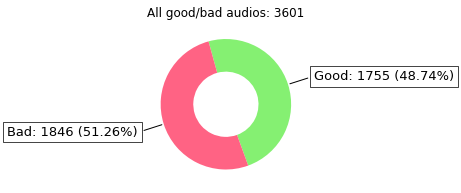

In [17]:
plt.figure(figsize=(15, 3))

caption = 'All good/bad audios'
plot_donut_goodbad_samples(1, caption, total_good_audios, total_bad_audios)

plt.show()

## Lengths of audios

In [20]:
all_lengths = [len(x) for x in series]
all_lengths = list(set(all_lengths))

all_lengths

[500]

## Show data

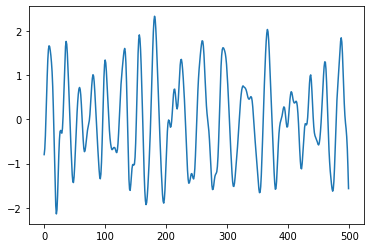

In [21]:
plt.plot(series[0])
plt.show()